In [1]:
bank_data <- read.csv(file = "bank.txt",sep = ";")
head(bank_data)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no


In [2]:
help(read.csv)

In [3]:
bank_data <- data.frame(bank_data)

In [4]:
head(bank_data)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no


In [5]:
str(bank_data)

'data.frame':	4521 obs. of  17 variables:
 $ age      : int  30 33 35 30 59 35 36 39 41 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 11 8 5 5 2 5 7 10 3 8 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 2 3 2 2 3 2 2 2 2 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 1 2 3 3 2 3 3 2 3 1 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ balance  : int  1787 4789 1350 1476 0 747 307 147 221 -88 ...
 $ housing  : Factor w/ 2 levels "no","yes": 1 2 2 2 2 1 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 2 1 2 1 1 1 1 1 2 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 1 1 1 3 3 1 1 1 3 1 ...
 $ day      : int  19 11 16 3 5 23 14 6 14 17 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 11 9 1 7 9 4 9 9 9 1 ...
 $ duration : int  79 220 185 199 226 141 341 151 57 313 ...
 $ campaign : int  1 1 1 4 1 2 1 2 2 1 ...
 $ pdays    : int  -1 339 330 -1 -1 176 330 -1 -1 147 ...
 $ p

In [6]:
summary(bank_data)

      age                 job          marital         education    default   
 Min.   :19.00   management :969   divorced: 528   primary  : 678   no :4445  
 1st Qu.:33.00   blue-collar:946   married :2797   secondary:2306   yes:  76  
 Median :39.00   technician :768   single  :1196   tertiary :1350             
 Mean   :41.17   admin.     :478                   unknown  : 187             
 3rd Qu.:49.00   services   :417                                              
 Max.   :87.00   retired    :230                                              
                 (Other)    :713                                              
    balance      housing     loan           contact          day       
 Min.   :-3313   no :1962   no :3830   cellular :2896   Min.   : 1.00  
 1st Qu.:   69   yes:2559   yes: 691   telephone: 301   1st Qu.: 9.00  
 Median :  444                         unknown  :1324   Median :16.00  
 Mean   : 1423                                          Mean   :15.92  
 3rd Qu.

In [7]:
sum(is.na(bank_data))

[1] 0

In [8]:
set.seed(786)

In [9]:
library(caret)

Warning message:
"package 'caret' was built under R version 3.6.2"Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [10]:
trainIndex <- createDataPartition(y=bank_data$y,p = 0.7,list = F)

In [11]:
train_data <- bank_data[trainIndex,]
test_data <- bank_data[-trainIndex,]

In [12]:
print(dim(train_data))
print(dim(test_data))

[1] 3165   17
[1] 1356   17


In [20]:
log_reg <- glm(formula = y~.,family = binomial,data = train_data)

In [21]:
summary(log_reg)


Call:
glm(formula = y ~ ., family = binomial, data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.1537  -0.3819  -0.2493  -0.1494   2.9904  

Coefficients:
                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -2.727e+00  7.218e-01  -3.778 0.000158 ***
age                -4.000e-03  8.529e-03  -0.469 0.639071    
jobblue-collar     -3.375e-01  2.887e-01  -1.169 0.242428    
jobentrepreneur    -2.894e-01  4.667e-01  -0.620 0.535133    
jobhousemaid       -4.147e-01  4.966e-01  -0.835 0.403609    
jobmanagement      -5.628e-02  2.904e-01  -0.194 0.846361    
jobretired          5.241e-01  3.691e-01   1.420 0.155546    
jobself-employed   -3.574e-01  4.345e-01  -0.823 0.410753    
jobservices        -6.354e-02  3.196e-01  -0.199 0.842408    
jobstudent          1.324e-01  4.832e-01   0.274 0.784069    
jobtechnician      -3.095e-01  2.782e-01  -1.113 0.265917    
jobunemployed      -4.874e-01  4.948e-01  -0.985 0.324621    

In [24]:
prob_train <- predict(object = log_reg,newdata = train_data, type = "response")

In [26]:
min(prob_train)

[1] 0.0001972362

In [27]:
#install.packages("ROCR")

package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Syed.Shariff\AppData\Local\Temp\RtmpWmHNsM\downloaded_packages


In [28]:
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 3.6.2"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.2"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [29]:
pred <- prediction(prob_train,train_data$y)

In [33]:
summary(pred)

    Length      Class       Mode 
         1 prediction         S4 

In [34]:
pred

An object of class "prediction"
Slot "predictions":
[[1]]
           1            3            4            5            7            8 
0.0837424657 0.1175520938 0.0158512414 0.0095061609 0.1538760113 0.0282571131 
           9           11           12           13           14           15 
0.0072542799 0.0175875326 0.0545424474 0.1263802754 0.2146891311 0.0093086380 
          16           17           18           19           20           21 
0.0527950308 0.0538221956 0.1036343390 0.0117549740 0.0728715505 0.0159363275 
          23           24           25           26           27           28 
0.0315131106 0.0296357593 0.0420422719 0.0658844545 0.0074555288 0.0314681680 
          29           31           32           33           34           35 
0.0176282246 0.7077481251 0.0370955465 0.0284590863 0.6655837911 0.1241035011 
          36           37           38           40           42           46 
0.0176602610 0.2288085499 0.0233211524 0.0029751155 0.0725135274 0.012052

In [36]:
perf <- performance(pred, measure="tpr", x.measure="fpr")

In [37]:
perf

An object of class "performance"
Slot "x.name":
[1] "False positive rate"

Slot "y.name":
[1] "True positive rate"

Slot "alpha.name":
[1] "Cutoff"

Slot "x.values":
[[1]]
   [1] 0.0000000000 0.0003571429 0.0003571429 0.0003571429 0.0003571429
   [6] 0.0003571429 0.0003571429 0.0003571429 0.0007142857 0.0010714286
  [11] 0.0014285714 0.0014285714 0.0014285714 0.0017857143 0.0017857143
  [16] 0.0017857143 0.0017857143 0.0017857143 0.0021428571 0.0025000000
  [21] 0.0028571429 0.0028571429 0.0032142857 0.0032142857 0.0032142857
  [26] 0.0035714286 0.0035714286 0.0035714286 0.0039285714 0.0039285714
  [31] 0.0039285714 0.0039285714 0.0039285714 0.0039285714 0.0042857143
  [36] 0.0046428571 0.0046428571 0.0046428571 0.0046428571 0.0046428571
  [41] 0.0046428571 0.0046428571 0.0050000000 0.0053571429 0.0057142857
  [46] 0.0057142857 0.0060714286 0.0060714286 0.0064285714 0.0067857143
  [51] 0.0071428571 0.0075000000 0.0075000000 0.0078571429 0.0078571429
  [56] 0.0082142857 0.0085714286 0.0

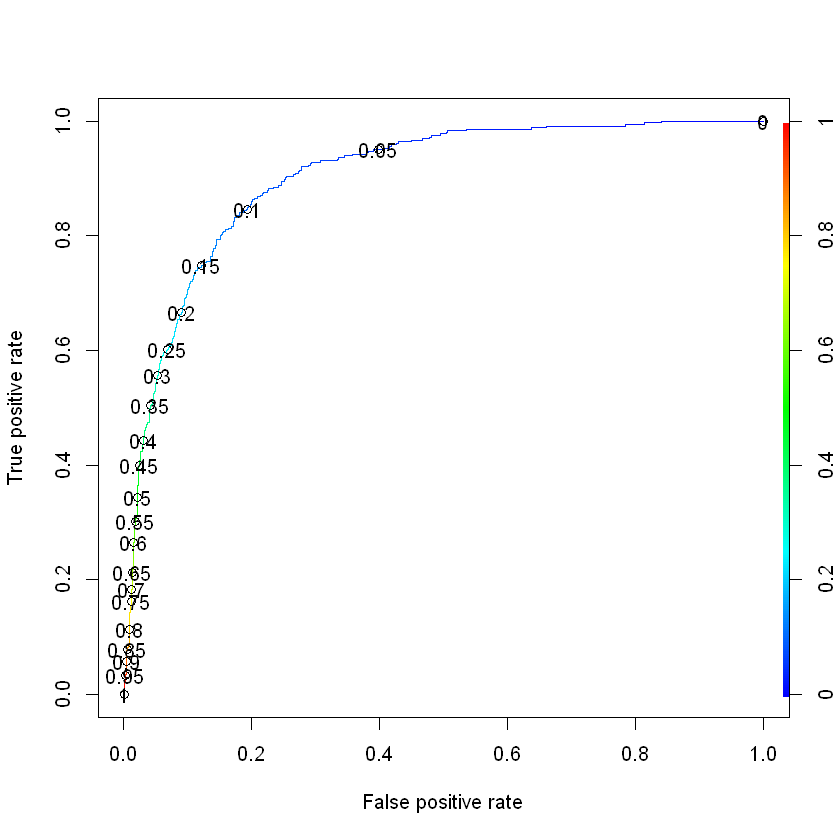

In [38]:
plot(perf, colorize=T, print.cutoffs.at=seq(0,1,0.05))

In [39]:
perf_auc <- performance(pred, measure="auc")

In [40]:
perf_auc

An object of class "performance"
Slot "x.name":
[1] "None"

Slot "y.name":
[1] "Area under the ROC curve"

Slot "alpha.name":
[1] "none"

Slot "x.values":
list()

Slot "y.values":
[[1]]
[1] 0.9036223


Slot "alpha.values":
list()


In [41]:
auc <- perf_auc@y.values[[1]]

print(auc)


[1] 0.9036223


In [42]:
prob_test <- predict(log_reg, test_data, type = "response")

preds_test <- ifelse(prob_test > 0.1, "yes", "no")

In [48]:
test_data_labs <- test_data$y

conf_matrix <- table(test_data_labs, preds_test)

conf_matrix

              preds_test
test_data_labs  no yes
           no  975 225
           yes  31 125

$${Specificity} = \frac{Number~of~True~Negatives}{Number~of~True~Negatives + Number~of~False~Positives}$$

In [49]:
specificity <- 975/(975+225)
print(specificity)

[1] 0.8125


$${Sensitivity} = \frac{Number~of~True~Positives}{Number~of~True~Positives + Number~of~False~Negatives}$$

In [52]:
sensitivity <- 125/(125+31)
sensitivity

[1] 0.8012821

$${Accuracy} = \frac{Number~of~True~Positives +Number~of~True~Negatives}{Number~Of~Subjects~in~the~Population}$$

In [63]:
accuracy <- (975+125)/length(preds_test)
accuracy

[1] 0.8112094

In [47]:
#install.packages("e1071")

package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Syed.Shariff\AppData\Local\Temp\RtmpWmHNsM\downloaded_packages


In [65]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 3.6.2"

In [64]:
confusionMatrix(as.factor(preds_test), test_data$y, positive = 'yes')

Confusion Matrix and Statistics

          Reference
Prediction  no yes
       no  975  31
       yes 225 125
                                          
               Accuracy : 0.8112          
                 95% CI : (0.7893, 0.8317)
    No Information Rate : 0.885           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.3983          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.80128         
            Specificity : 0.81250         
         Pos Pred Value : 0.35714         
         Neg Pred Value : 0.96918         
             Prevalence : 0.11504         
         Detection Rate : 0.09218         
   Detection Prevalence : 0.25811         
      Balanced Accuracy : 0.80689         
                                          
       'Positive' Class : yes             
                              